In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import tensorflow as tf
from keras import models, layers, optimizers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus #py dot plus

sns.set()

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df_target = df.groupby('target').size()

### Disease Prevalence w.r.t total population

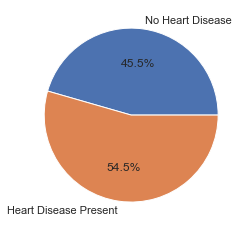

In [4]:
plt.pie(df_target.values, labels=['No Heart Disease', 'Heart Disease Present'], autopct='%1.1f%%')
plt.show()

## Disease Prevalence w.r.t Gender

In [5]:
df_sex = df.groupby(['sex', 'target']).size()
df_sex

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

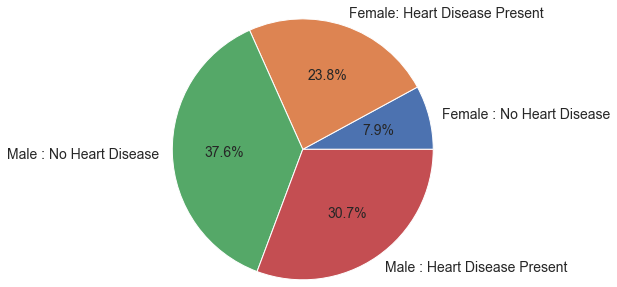

In [6]:
plt.pie(df_sex.values,
        labels=['Female : No Heart Disease', 'Female: Heart Disease Present',
                              'Male : No Heart Disease', 'Male : Heart Disease Present'], 
       autopct='%1.1f%%', radius=1.5, 
       textprops={'fontsize':14})
plt.show()

## Distrubution w.r.t Age

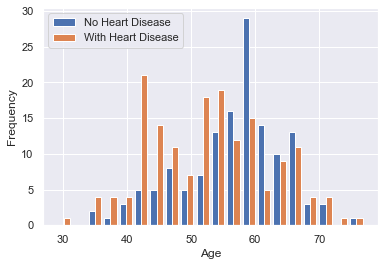

In [7]:
plt.hist([df[df.target==0]['age'], df[df.target==1]['age']], bins=20,
                           label=['No Heart Disease', 'With Heart Disease'])
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,5)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# People over 40 are under risk of heart disease 

## Distribution w.r.t Choleterol levels

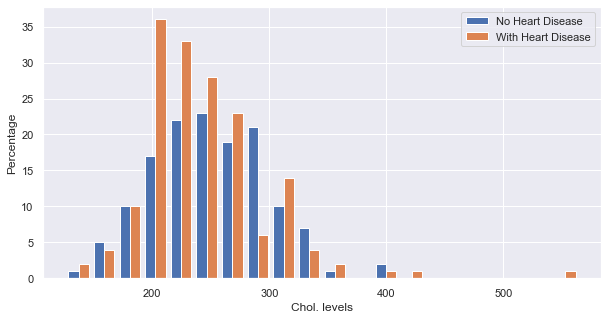

In [8]:
plt.hist([df[df['target']==0]['chol'], df[df['target']==1]['chol']],
        bins=20,
        label=['No Heart Disease', 'With Heart Disease'])
plt.xlabel('Chol. levels')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# People with over 200mg/dl Chol. are at higher risk

## Distribution w.r.t Resting Blood Pressure

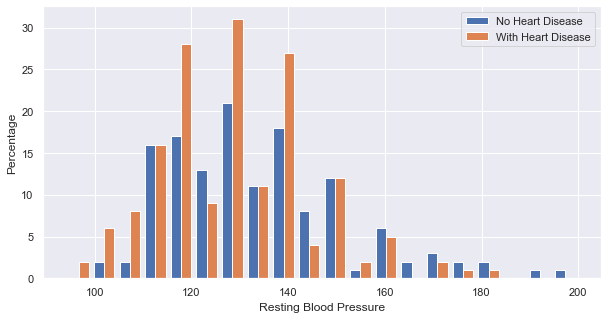

In [9]:
plt.hist([df[df['target']==0]['trestbps'], df[df['target']==1]['trestbps']],
        bins=20,
        label=['No Heart Disease','With Heart Disease'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Ideal BP should be lower than 120mm Hg

## Distribution w.r.t Maximum Heart Rate Achieved

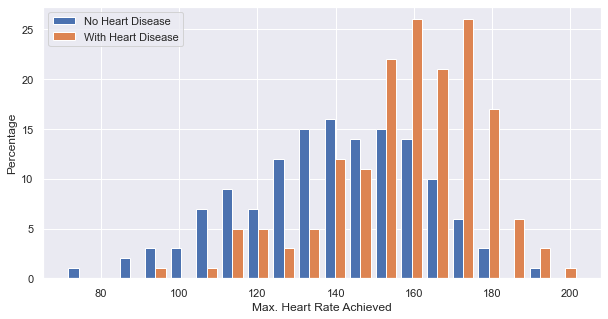

In [10]:
plt.hist([df[df['target']==0]['thalach'], df[df['target']==1]['thalach']],
        bins=20,
        label=['No Heart Disease', 'With Heart Disease'])
plt.xlabel('Max. Heart Rate Achieved')
plt.ylabel('Percentage')
plt.legend()
plt.show()

# Patients with heart disease tend to have a higher heart rate

# Deal with Outliers

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
cont_cols = ['age','trestbps','chol','thalach','oldpeak']

In [13]:
df1 = df[cont_cols]

In [14]:
df1.describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


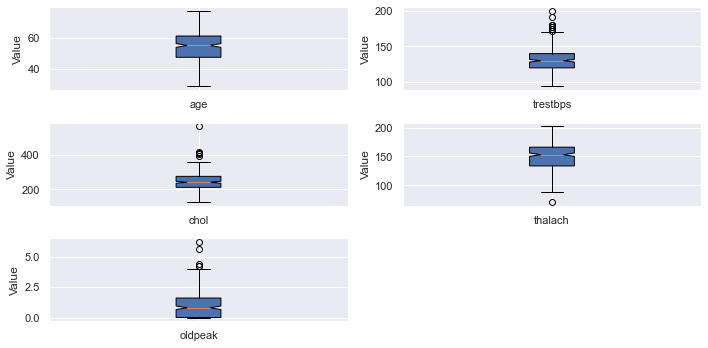

In [15]:
for item in df1.columns:
    plt.subplot(3, 2, list(df1.columns).index(item)+1)
    plt.boxplot(df1[item], labels=[item], patch_artist=True, notch=True)
    plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [16]:
info_df = df.describe()

In [17]:
info_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
df_trest = df[df['trestbps'] < info_df.loc['mean','trestbps'] + 3 * info_df.loc['std','trestbps']]

In [19]:
df_chol = df_trest[df_trest['chol'] < info_df.loc['mean','chol'] + 3 * info_df.loc['std','chol']]

In [20]:
df_thalach = df_chol[df_chol['thalach'] > info_df.loc['mean','thalach'] - 3 * info_df.loc['std','thalach']]

In [21]:
df_new = df_thalach[df_thalach['oldpeak'] < info_df.loc['mean','oldpeak'] + 3 * info_df.loc['std','oldpeak']]

In [22]:
df_new.reset_index(drop=True)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
292,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [23]:
features = df_new.columns.drop('target')
# features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [24]:
X = pd.DataFrame(data=df_new, columns=features)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
scaler =  StandardScaler()

In [26]:
# scale_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
# scaler.fit(X[scale_col])
# x_scaled = scaler.transform(X[scale_col])
scaler.fit(X)

StandardScaler()

In [28]:
x_scaled = scaler.transform(X)

In [29]:
x_scaled

array([[ 0.96992005,  0.66421116,  1.95538668, ..., -2.34136864,
        -0.70324145, -2.12748176],
       [-1.88824066,  0.66421116,  0.98756903, ..., -2.34136864,
        -0.70324145, -0.49010051],
       [-1.44852362, -1.50554531,  0.01975138, ...,  0.96806588,
        -0.70324145, -0.49010051],
       ...,
       [ 1.51956634,  0.66421116, -0.94806627, ..., -0.68665138,
         1.27525603,  1.14728074],
       [ 0.3103445 ,  0.66421116, -0.94806627, ..., -0.68665138,
         0.28600729,  1.14728074],
       [ 0.3103445 , -1.50554531,  0.01975138, ..., -0.68665138,
         0.28600729, -0.49010051]])

In [30]:
Y = pd.DataFrame(df_new['target'])
# Y.head()
Y = Y.values.flatten()
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [217]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,Y,train_size=0.85)

# Prediction using KNN Algorithm

In [218]:
tr_acc = []
ts_acc = []

for i in range(1,20):
    kmodel = KNeighborsClassifier(n_neighbors = i)
    kmodel.fit(xtrain,ytrain)

    tr_acc.append(kmodel.score(xtrain,ytrain))
    ts_acc.append(kmodel.score(xtest,ytest))

In [219]:
print("Training Accuracy: ", tr_acc)
print("******************************************")
print("******************************************")
print("Test Accuracy: ", ts_acc)

Training Accuracy:  [1.0, 0.8955823293172691, 0.8674698795180723, 0.8634538152610441, 0.8514056224899599, 0.8674698795180723, 0.8714859437751004, 0.8594377510040161, 0.8514056224899599, 0.8473895582329317, 0.8433734939759037, 0.8433734939759037, 0.8514056224899599, 0.8473895582329317, 0.8353413654618473, 0.8353413654618473, 0.8473895582329317, 0.8273092369477911, 0.8353413654618473]
******************************************
******************************************
Test Accuracy:  [0.8, 0.8222222222222222, 0.8222222222222222, 0.8, 0.8666666666666667, 0.8666666666666667, 0.8666666666666667, 0.8888888888888888, 0.8222222222222222, 0.8222222222222222, 0.8222222222222222, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8444444444444444, 0.8222222222222222]


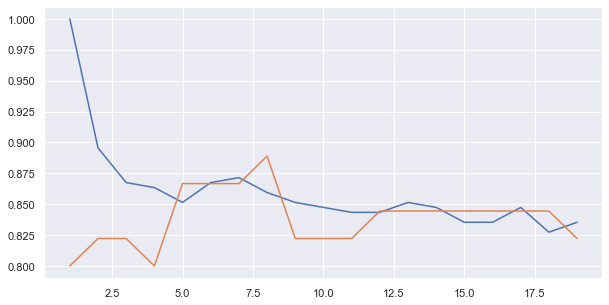

In [220]:
plt.plot(range(1,20) , tr_acc)
plt.plot(range(1,20) , ts_acc)     
plt.show()

# accuracy is best when k = 6

In [221]:
tr_acc[7]

0.8594377510040161

In [222]:
ts_acc[7]

0.8888888888888888

# Prediction with Logistic Regression

In [223]:
lmodel = LogisticRegression()

In [224]:
lmodel.fit(xtrain, ytrain)

LogisticRegression()

In [225]:
# Training Accuracy
ytrainPred = lmodel.predict(xtrain)
(ytrain==ytrainPred).sum()/len(ytrain)

0.8473895582329317

In [226]:
# Testing Accuracy
ytestPred = lmodel.predict(xtest)
(ytest==ytestPred).sum()/len(ytest)

0.8444444444444444

# Decision Tree Classifier

In [227]:
# dmodel = DecisionTreeClassifier()
dmodel = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5)
dmodel.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5)

In [228]:
print(dmodel.score(xtrain, ytrain))
print(dmodel.score(xtest, ytest))

0.8313253012048193
0.8


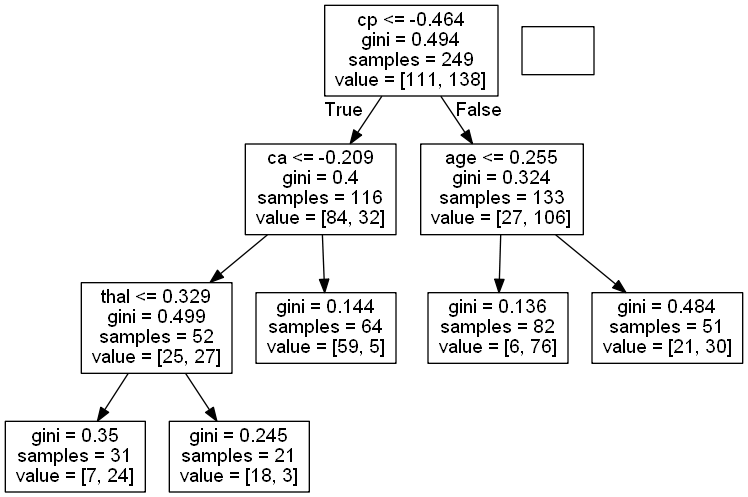

In [229]:
# dot_data = export_graphviz(dmodel)
dot_data = export_graphviz(dmodel, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest Classifier

In [230]:
rmodel = RandomForestClassifier(n_estimators=10, max_depth=8,max_leaf_nodes=5) # Will create 200 trees, the majority will make the decision

In [231]:
rmodel.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=8, max_leaf_nodes=5, n_estimators=10)

In [232]:
print(rmodel.score(xtrain, ytrain))
print(rmodel.score(xtest, ytest))

0.8714859437751004
0.8222222222222222


# Naive Bayes Algorithm

In [233]:
nbmodel = GaussianNB()

In [234]:
nbmodel.fit(xtrain, ytrain)

GaussianNB()

In [235]:
print(nbmodel.score(xtrain, ytrain))
print(nbmodel.score(xtest, ytest))

0.8353413654618473
0.8444444444444444


# Support Vector Machines

In [236]:
smodel = SVC(kernel='linear', probability=True)

In [237]:
smodel.fit(xtrain, ytrain)

SVC(kernel='linear', probability=True)

In [238]:
smodel.score(xtrain, ytrain)

0.8634538152610441

In [239]:
smodel.score(xtest, ytest)

0.8444444444444444

# Artificial Neural Networks

In [240]:
from keras.utils import np_utils
ytrainC = np_utils.to_categorical(ytrain)
ytestC = np_utils.to_categorical(ytest)

In [241]:
annmodel = models.Sequential()
annmodel.add(layers.Dense(16, input_dim=xtrain.shape[1], activation='relu'))
annmodel.add(layers.Dense(8, activation='relu'))
annmodel.add(layers.Dense(2, activation='sigmoid'))

In [242]:
annmodel.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 16)                224       
_________________________________________________________________
dense_71 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_72 (Dense)             (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________


In [243]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
annmodel.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [246]:
annmodel.fit(xtrain, ytrainC, epochs=42, validation_data=(xtest, ytestC))

Epoch 1/42
8/8 [==============================] - 0s 7ms/step - loss: 0.2071 - accuracy: 0.9237 - val_loss: 0.4297 - val_accuracy: 0.8222
Epoch 2/42
8/8 [==============================] - 0s 4ms/step - loss: 0.2051 - accuracy: 0.9237 - val_loss: 0.4319 - val_accuracy: 0.8222
Epoch 3/42
8/8 [==============================] - 0s 5ms/step - loss: 0.2034 - accuracy: 0.9237 - val_loss: 0.4320 - val_accuracy: 0.8222
Epoch 4/42
8/8 [==============================] - 0s 4ms/step - loss: 0.2019 - accuracy: 0.9277 - val_loss: 0.4332 - val_accuracy: 0.8222
Epoch 5/42
8/8 [==============================] - 0s 4ms/step - loss: 0.1999 - accuracy: 0.9317 - val_loss: 0.4344 - val_accuracy: 0.8222
Epoch 6/42
8/8 [==============================] - 0s 5ms/step - loss: 0.1981 - accuracy: 0.9317 - val_loss: 0.4363 - val_accuracy: 0.8222
Epoch 7/42
8/8 [==============================] - 0s 4ms/step - loss: 0.1966 - accuracy: 0.9317 - val_loss: 0.4384 - val_accuracy: 0.8222
Epoch 8/42
8/8 [==================